## SEIR Model
The SIR model is often good for basic simulations, but one immediate issue crops up. A person is not always immediately infectious as soon as they come in contact with an infected person. The period in between a susceptible person coming in contact with an infected person, and that person becoming infectious, is called as the period in which this individual is **exposed**. This entails the addition of another compartment, E or exposed, in addition to the S, I and R compartments.<br>

The compartment model can be diagrammed as follows.

$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modelled as follows.

* $\frac{\beta S I}{N}$ is the rate at which the susceptible population encounters the infected population resulting in trasmission of the disease. $S$ is the size of the susceptible population. The definition is similar to that of the SIR model.
* $\alpha E$ is the rate at which exposed population becomes infective, where $E$ is the size of the exposed population. The average period of time in the exposed state is the incubation period of the disease, and equal to $\frac{1}{\alpha}$.
* $\gamma I$ is the rate at which infected population recovers and becomes resistant to further infection. The definition is similar to that of the SIR model.

An elementary model for the spread of an infectious disease in a uniform population is given by the deterministic SEIR equations}

After substitution, this results in a system of four equations.

\begin{align*}
\frac{dS}{dt} & = \frac{-\beta S I}{N} \\
\frac{dE}{dt} & = \frac{\beta S I} {N} - \alpha E \\
\frac{dI}{dt} & = \alpha E  - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align*} 

where $S + E + I + R = N$ is an invariant.

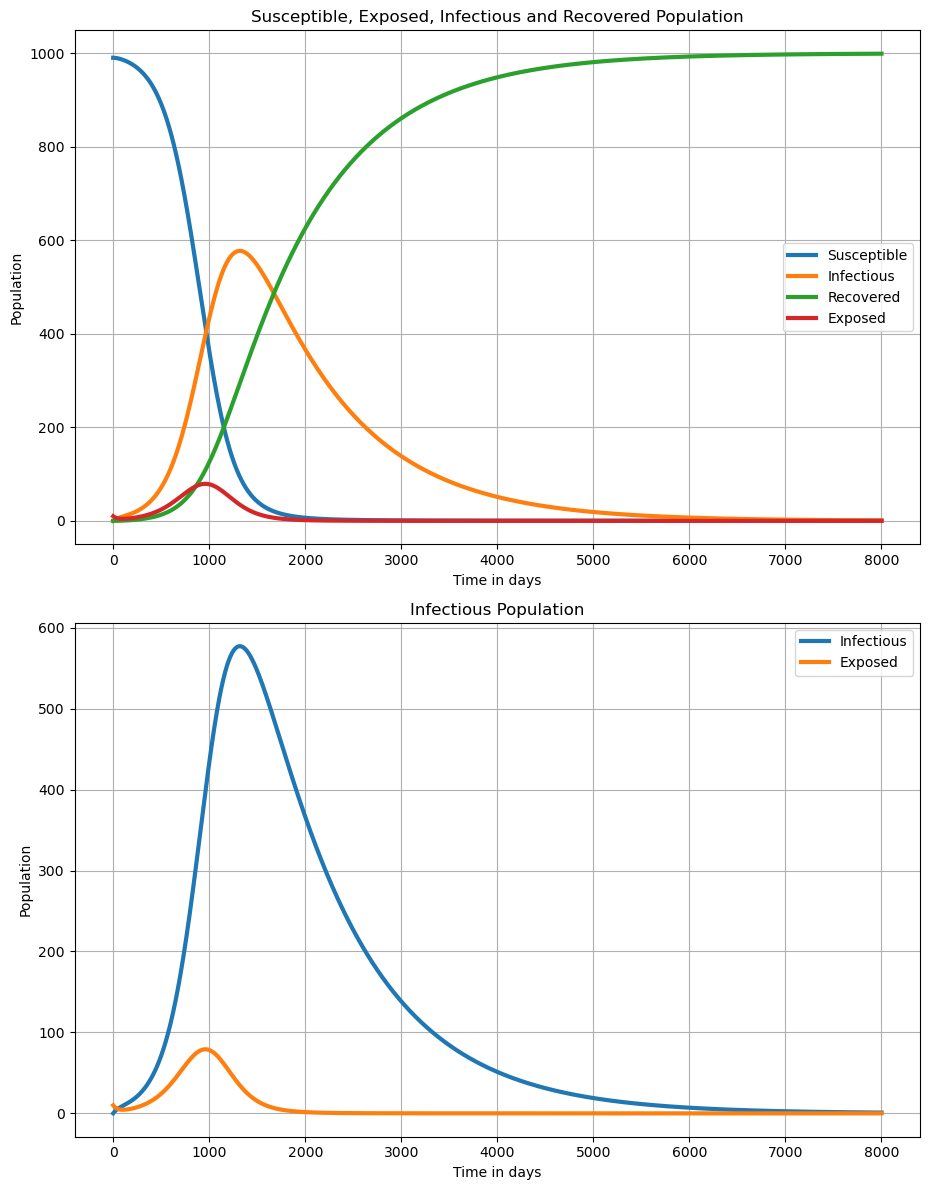

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 8
t_incubation = 60
t_infective = 1000

# initial number of infected and recovered individuals
N=1000
E_initial = 0.01 * N
I_initial = 0
R_initial = 0
S_initial = N - E_initial - I_initial - R_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def SEIR(x, t, N, alpha, beta, gamma):
    S, E, I, R = x
    dSdt = -beta * S * I / N
    dEdt =  beta * S * I / N - alpha * E
    dIdt = alpha * E - gamma * I
    dRdt =  gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

t = np.linspace(0, 8000, 8000)
x_initial = S_initial, E_initial, I_initial, R_initial
soln = odeint(SEIR, x_initial, t, args=(N, alpha, beta, gamma))
S, E, I, R = soln.T

#plotting the data
def plotdata(t, S, I, E): 
    fig = plt.figure(figsize=(18,12))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223)]

    ax[0].plot(t, S, lw=3, label='Susceptible')
    ax[0].plot(t, I, lw=3, label='Infectious')
    ax[0].plot(t, R, lw=3, label='Recovered')
    ax[0].plot(t, E, lw=3, label='Exposed')
    ax[0].set_title('Susceptible, Exposed, Infectious and Recovered Population')
    ax[0].set_xlabel('Time in days')
    ax[0].set_ylabel('Population')

    ax[1].plot(t, I, lw=3, label='Infectious')
    ax[1].plot(t, E, lw=3, label='Exposed')
    ax[1].set_title('Infectious Population')
    ax[1].set_xlabel('Time in days')
    ax[1].set_ylabel('Population')
    
    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()

plotdata(t, S, I, E)

The addition of an exposed population compartment slows the outbreak, but doesn't appear to significantly reduce the number of people ultimately infected by the disease. 